# SIIM-ISIC Melanoma Classification: Exploratory Data Analysis

#### Authors: Jaime Ferrando Huertas, Javier Martínez Bernia
#### May 2021 @ MIARFID, UPV

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

### Load the data

In [2]:
train_dir = 'data/train/'
test_dir = 'data/test'

train_data = [file for file in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir,file))]
test_data = [file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir,file))]
print('10 training images', train_data[:10])

10 training images ['ISIC_8600358.jpg', 'ISIC_4957730.jpg', 'ISIC_7452152.jpg', 'ISIC_8455853.jpg', 'ISIC_2657946.jpg', 'ISIC_8189028.jpg', 'ISIC_0422301.jpg', 'ISIC_2049142.jpg', 'ISIC_2729747.jpg', 'ISIC_1368217.jpg']


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [5]:
test.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

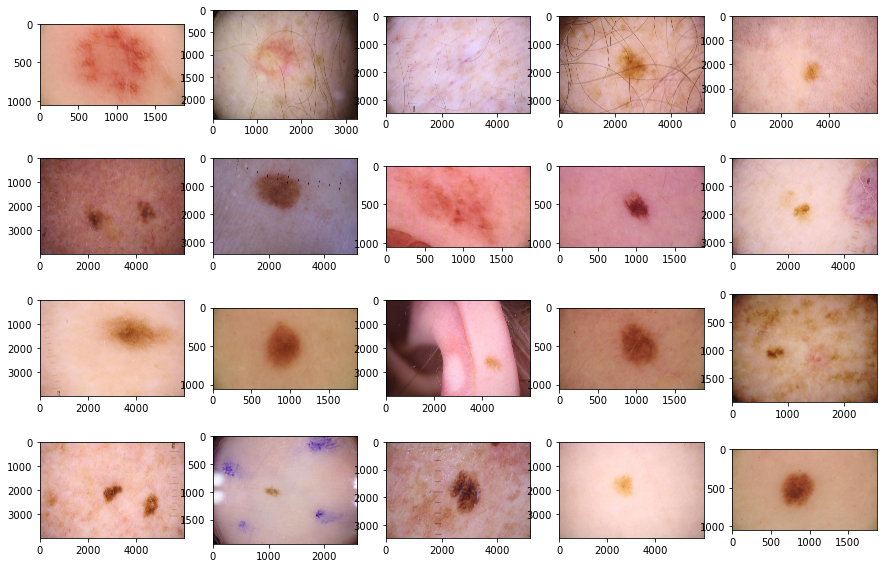

In [6]:
# See some images
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train_data[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

In [7]:
df = pd.DataFrame(train.benign_malignant.value_counts())
print(df, '\n')
print('Benign %: ', df.benign_malignant[0] / (df.benign_malignant[0] + df.benign_malignant[1]))
print('Malign %: ', df.benign_malignant[1] / (df.benign_malignant[0] + df.benign_malignant[1]))

           benign_malignant
benign                32542
malignant               584 

Benign %:  0.9823703435367989
Malign %:  0.01762965646320111


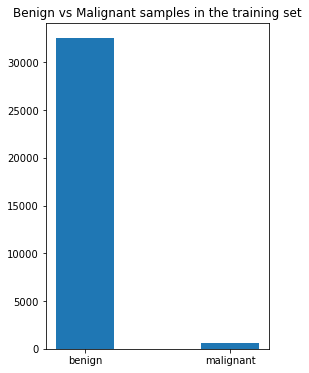

In [22]:
fig = plt.figure(figsize=(4,6))
plt.bar(['benign', 'malignant'],df.benign_malignant, 0.4)
plt.title("Benign vs Malignant samples in the training set")
plt.show()

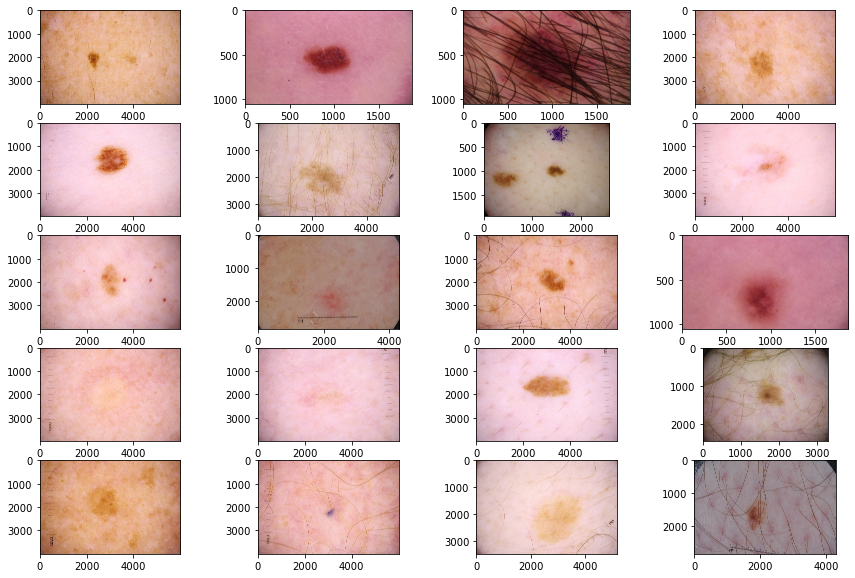

In [23]:
# View some benign images
vals = train[train['benign_malignant']=='benign']['image_name'].index.values

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train[train['benign_malignant']=='benign']['image_name'][vals[i]] + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

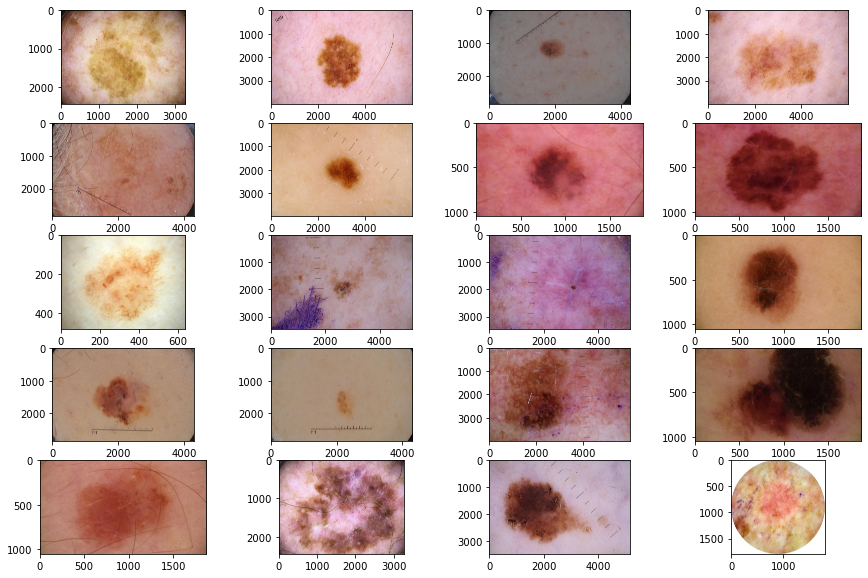

In [24]:
# View some malignant images
vals = train[train['benign_malignant']=='malignant']['image_name'].index.values

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train[train['benign_malignant']=='malignant']['image_name'][vals[i]] + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

In [49]:
# Which part of the body
df = pd.DataFrame(train.anatom_site_general_challenge.value_counts())
df['per'] = train.anatom_site_general_challenge.value_counts() / train.anatom_site_general_challenge.value_counts().sum() * 100
print(df)

                 anatom_site_general_challenge        per
torso                                    16845  51.673364
lower extremity                           8417  25.819810
upper extremity                           4983  15.285745
head/neck                                 1855   5.690359
palms/soles                                375   1.150342
oral/genital                               124   0.380380


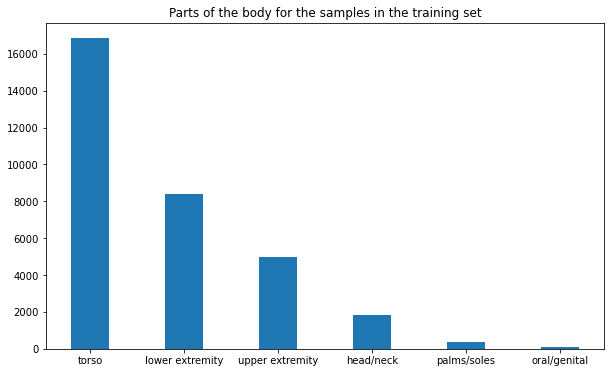

In [50]:
fig = plt.figure(figsize=(10,6))
plt.bar(list(df.index),df.anatom_site_general_challenge, 0.4)
plt.title("Parts of the body for the samples in the training set")
plt.show()

In [51]:
# Diagnosis
df = pd.DataFrame(train.diagnosis.value_counts())
df['%'] = train.diagnosis.value_counts() / train.diagnosis.value_counts().sum() * 100
print(df)

                                    diagnosis          %
unknown                                 27124  81.881302
nevus                                    5193  15.676508
melanoma                                  584   1.762966
seborrheic keratosis                      135   0.407535
lentigo NOS                                44   0.132826
lichenoid keratosis                        37   0.111695
solar lentigo                               7   0.021131
atypical melanocytic proliferation          1   0.003019
cafe-au-lait macule                         1   0.003019


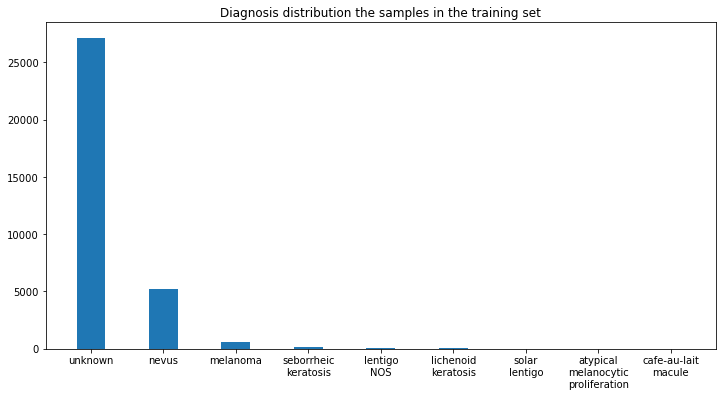

In [60]:
fig = plt.figure(figsize=(12,6))
index = [i.replace(' ', '\n') for i in list(df.index)]
plt.bar(index,df.diagnosis, 0.4)
plt.title("Diagnosis distribution the samples in the training set")
plt.show()

In [61]:
# Function for viewing images

def view_images(images, title = '', aug = None):
    width = 6
    height = 4
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    for im in range(0, height * width):  
        image = Image.open(os.path.join(train_dir, list(images)[im]+ '.jpg'))
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    plt.show()

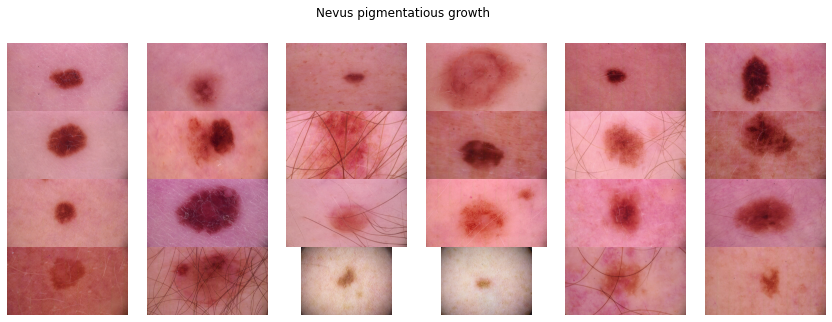

In [62]:
view_images(train[train['diagnosis']=='nevus']['image_name'], title="Nevus pigmentatious growth");

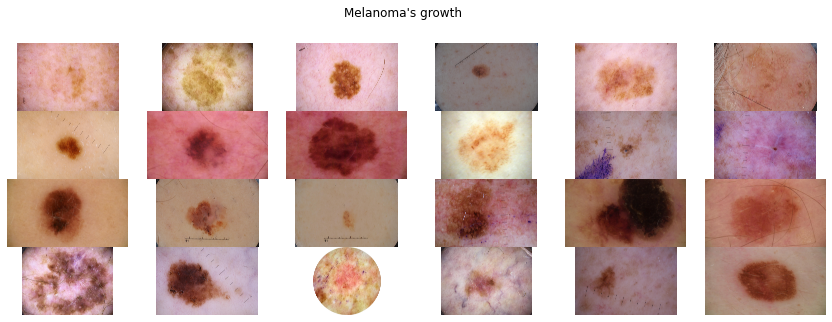

In [63]:
view_images(train[train['diagnosis']=='melanoma']['image_name'], title="Melanoma's growth");

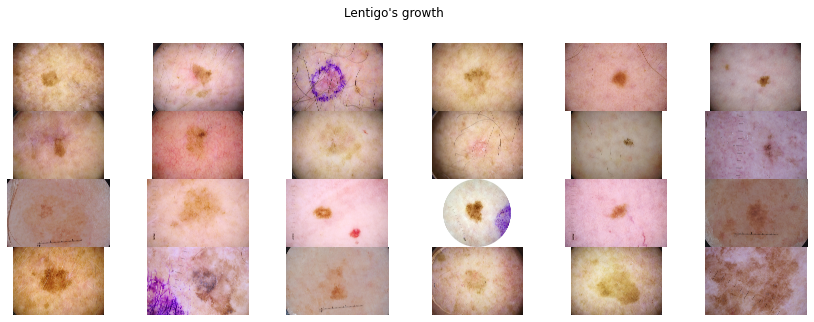

In [64]:
view_images(train[train['diagnosis']=='lentigo NOS']['image_name'], title="Lentigo's growth");

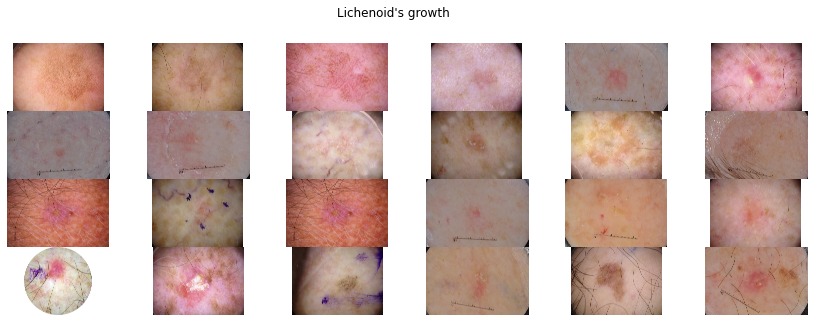

In [65]:
view_images(train[train['diagnosis']=='lichenoid keratosis']['image_name'], title="Lichenoid's growth");

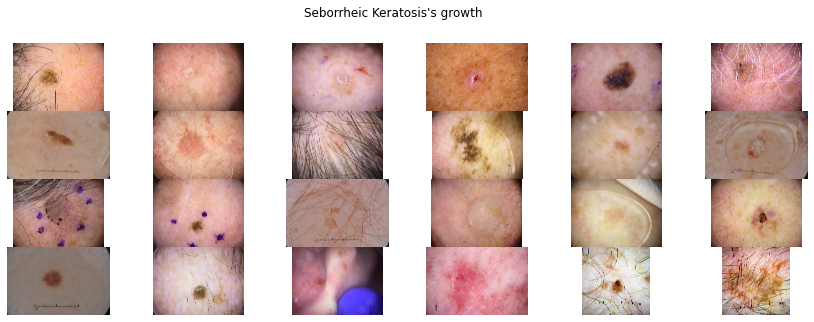

In [66]:
view_images(train[train['diagnosis']=='seborrheic keratosis']['image_name'], title="Seborrheic Keratosis's growth");

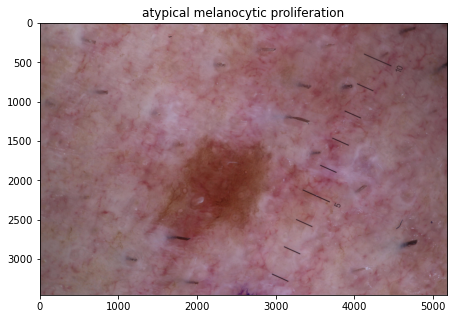

In [67]:
#print(train[train['diagnosis']=='atypical melanocytic proliferation'])
image = Image.open(os.path.join(train_dir, train[train['diagnosis']=='atypical melanocytic proliferation']['image_name'].to_string(index=None).strip() + '.jpg'))
fig=plt.figure(figsize=(8, 5))
plt.imshow(image, cmap=plt.cm.bone)
plt.title('atypical melanocytic proliferation')
plt.show()

In [69]:
df = pd.DataFrame(train.age_approx.value_counts())
df['%'] = train.age_approx.value_counts() / train.age_approx.value_counts().sum()
print(df)

      age_approx         %
45.0        4466  0.135096
50.0        4270  0.129167
55.0        3824  0.115675
40.0        3576  0.108174
60.0        3240  0.098010
35.0        2850  0.086212
65.0        2527  0.076441
30.0        2358  0.071329
70.0        1968  0.059532
25.0        1544  0.046706
75.0         981  0.029675
20.0         655  0.019814
80.0         419  0.012675
85.0         149  0.004507
15.0         132  0.003993
90.0          80  0.002420
10.0          17  0.000514
0.0            2  0.000060


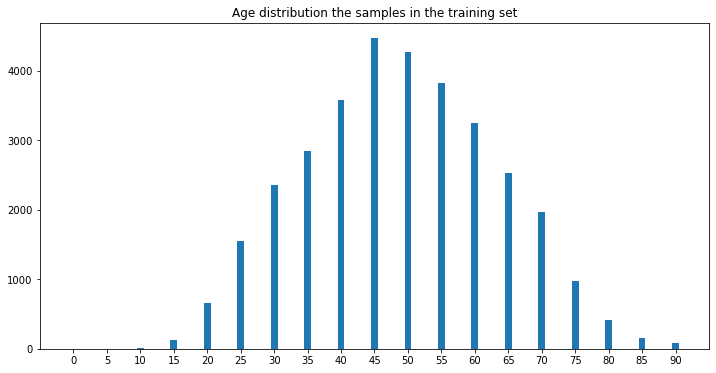

In [75]:
fig = plt.figure(figsize=(12,6))
plt.bar(list(df.index), df.age_approx, 1)
plt.xticks(np.arange(min(list(df.index)), max(list(df.index))+1, 5.0))
plt.title("Age distribution the samples in the training set")
plt.show()

In [76]:
def view_images_normalized(images, title = '', aug = None):
    width = 6
    height = 5
    fig, axs = plt.subplots(height, width, figsize=(15,15))
    for im in range(0, height * width):  
        image = cv2.imread(os.path.join(train_dir, list(images)[im]+ '.jpg'), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(256,256))
        image[:, :, 0] = clahe.apply(image[:, :, 0])
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)

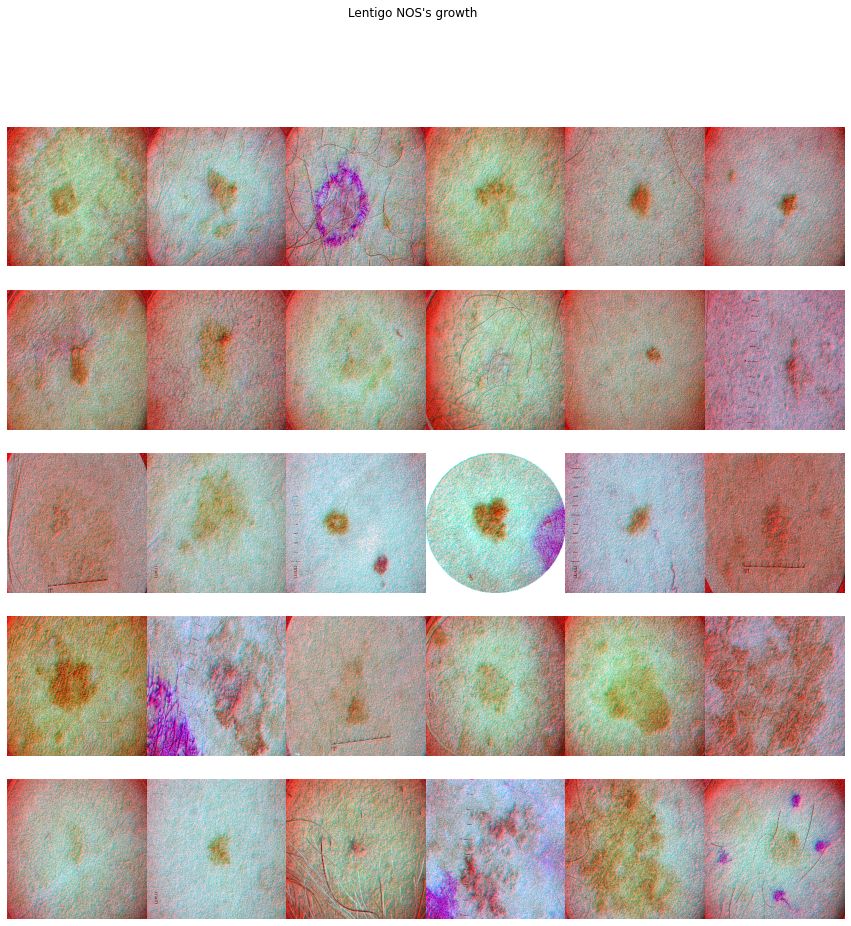

In [77]:
view_images_normalized(train[train['diagnosis']=='lentigo NOS']['image_name'], title="Lentigo NOS's growth");